In [1323]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [1324]:
data = np.loadtxt('data.dat')

In [1325]:
# Removing most of the elastic channel events to better sample other Z
data = data[:1000000,:]

del_rows = []
for i in range(len(data)):
    if data[i,0] > 15.9 and (i)%8 != 0:
        del_rows.append(i)

data = np.delete(data, del_rows, 0)

In [1326]:
print(len(data))

150916


In [1327]:
energy_train = data[:40000, 1:41]
label_train = data[:40000,0] -12
energy_val = data[40000:45000, 1:41]
label_val = data[40000:45000,0] -12
energy_test = data[80000:, 1:41]
label_test = data[80000:,0] -12

In [1328]:
#energy_train.astype("float32")
#energy_val.astype("float32")
#energy_test.astype("float32")


In [1329]:
#print(energy_train[0,:])
#print(label_val)

In [1330]:
energy_train = energy_train / energy_train.max()
energy_val = energy_val / energy_val.max()
energy_test = energy_test / energy_test.max()

In [1331]:
model = Sequential()
model.add(Flatten(input_shape=(40,1)))
model.add(Dense(40, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [1332]:
model.summary()

Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_85 (Flatten)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 5)              │           205 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,845 (7.21 KB)

 Trainable params: 1,845 (7.21 KB)

 Non-trainable params: 0 (0.00 B)

In [1333]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [1334]:
train = model.fit(energy_train, label_train, batch_size=256, epochs=200, validation_data=(energy_val,label_val))

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.6156 - loss: 1.2520 - val_accuracy: 0.7996 - val_loss: 0.6194
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.7997 - loss: 0.6055 - val_accuracy: 0.7996 - val_loss: 0.5650
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7964 - loss: 0.5728 - val_accuracy: 0.7996 - val_loss: 0.5410
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.8035 - loss: 0.5385 - val_accuracy: 0.8002 - val_loss: 0.5219
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.8023 - loss: 0.5208 - val_accuracy: 0.8004 - val_loss: 0.5075
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7996 - loss: 0.5174 - val_accuracy: 0.8004 - val_loss: 0.4956
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7995 - loss: 0.4994 - val_accuracy: 0.8010 - val_loss: 0.4849
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7963 - loss: 0

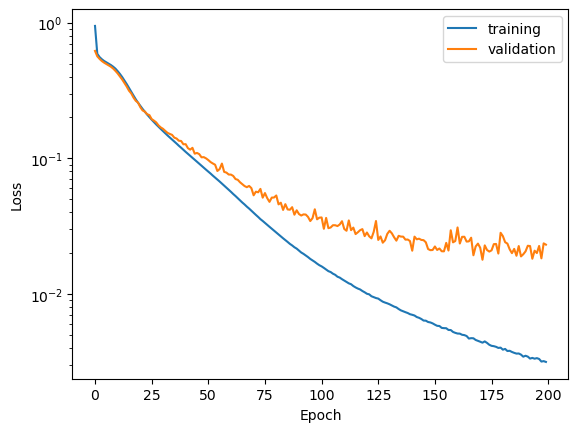

In [1335]:
plt.plot(train.epoch, train.history["loss"], label="training")
plt.plot(train.epoch, train.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")

Text(0, 0.5, 'Accuracy')

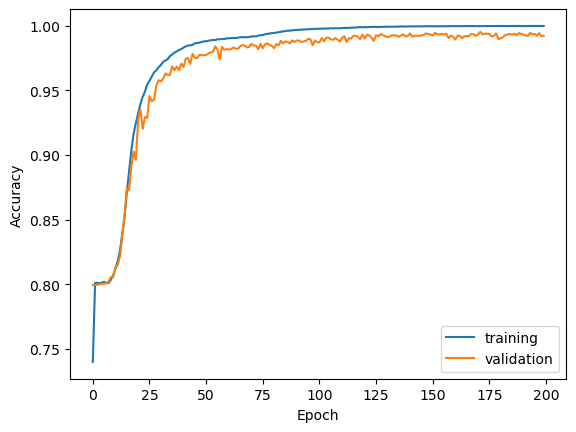

In [1336]:
plt.plot(train.epoch, train.history["accuracy"], label="training")
plt.plot(train.epoch, train.history["val_accuracy"], label="validation")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
#plt.yscale("log")
#plt.xlim(3,100)
#plt.ylim(0.96,1)

In [1337]:
print("Evaluate on test data")
test = model.evaluate(energy_test, label_test, batch_size=256)

Evaluate on test data
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.9971 - loss: 0.0144


In [1338]:
samples = 3
print("Generate predictions for ",samples," samples (Z)")
predictions = model.predict(energy_test[:samples])

for i in range(samples):
    print("Predictions = ", predictions[i])
    print("Label = ", label_test[i])


Generate predictions for  3  samples (Z)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predictions =  [0.0000000e+00 0.0000000e+00 1.5443143e-26 1.9409603e-27 1.0000000e+00]
Label =  4.0
Predictions =  [6.0220934e-32 2.2669155e-29 6.1309473e-16 4.6970249e-06 9.9999535e-01]
Label =  4.0
Predictions =  [0.0000000e+00 0.0000000e+00 2.3155404e-27 1.3448390e-26 1.0000000e+00]
Label =  4.0
